<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [IMDB1] - Sentiment analysis with text embedding
<!-- DESC --> A very classical example of word embedding with a dataset from Internet Movie Database (IMDB)
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - The objective is to guess whether film reviews are **positive or negative** based on the analysis of the text. 
 - Understand the management of **textual data** and **sentiment analysis**

Original dataset can be find **[there](http://ai.stanford.edu/~amaas/data/sentiment/)**  
Note that [IMDb.com](https://imdb.com) offers several easy-to-use [datasets](https://www.imdb.com/interfaces/)  
For simplicity's sake, we'll use the dataset directly [embedded in Keras](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.datasets.imdb as imdb

import matplotlib.pyplot as plt
import matplotlib

import os,sys,h5py,json
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('IMDB1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.14
Notebook id          : IMDB1
Run time             : Wednesday 10 February 2021, 10:46:47
TensorFlow version   : 2.4.0
Keras version        : 2.4.0
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data

IMDb dataset can bet get directly from Keras - see [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)  
Note : Due to their nature, textual data can be somewhat complex.

### 2.1 - Data structure :  
The dataset is composed of 2 parts: 

 - **reviews**, this will be our **x**
 - **opinions** (positive/negative), this will be our **y**

There are also a **dictionary**, because words are indexed in reviews

```
<dataset> = (<reviews>, <opinions>)

with :  <reviews>  = [ <review1>, <review2>, ... ]
        <opinions> = [ <rate1>,   <rate2>,   ... ]   where <ratei>   = integer

where : <reviewi> = [ <w1>, <w2>, ...]    <wi> are the index (int) of the word in the dictionary
        <ratei>   = int                   0 for negative opinion, 1 for positive


<dictionary> = [ <word1>:<w1>, <word2>:<w2>, ... ]

with :  <wordi>   = word
        <wi>      = int

```

### 2.2 - Get dataset
For simplicity, we will use a pre-formatted dataset - See [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data)  
However, Keras offers some usefull tools for formatting textual data - See [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text)  

**Load dataset :**

In [2]:
vocab_size = 10000

# ----- Retrieve x,y

# Uncomment this if you want to load dataset directly from keras (small size <20M)
#
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words  = vocab_size,
                                                       skip_top   = 0,
                                                       maxlen     = None,
                                                       seed       = 42,
                                                       start_char = 1,
                                                       oov_char   = 2,
                                                       index_from = 3, )

# To load a h5 version of the dataset :
#
# with  h5py.File(f'{datasets_dir}/IMDB/origine/dataset_imdb.h5','r') as f:
#        x_train = f['x_train'][:]
#        y_train = f['y_train'][:]
#        x_test  = f['x_test'][:]
#        y_test  = f['y_test'][:]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


/gpfslocalsup/pub/anaconda-py3/2020.02/envs/tensorflow-gpu-2.4.0/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


/gpfslocalsup/pub/anaconda-py3/2020.02/envs/tensorflow-gpu-2.4.0/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


**About this dataset :**

In [3]:
print("  Max(x_train,x_test)  : ", pwk.rmax([x_train,x_test]) )
print("  x_train : {}  y_train : {}".format(x_train.shape, y_train.shape))
print("  x_test  : {}  y_test  : {}".format(x_test.shape,  y_test.shape))

print('\nReview example (x_train[12]) :\n\n',x_train[12])

  Max(x_train,x_test)  :  9999
  x_train : (25000,)  y_train : (25000,)
  x_test  : (25000,)  y_test  : (25000,)

Review example (x_train[12]) :

 [1, 14, 22, 1367, 53, 206, 159, 4, 636, 898, 74, 26, 11, 436, 363, 108, 7, 14, 432, 14, 22, 9, 1055, 34, 8599, 2, 5, 381, 3705, 4509, 14, 768, 47, 839, 25, 111, 1517, 2579, 1991, 438, 2663, 587, 4, 280, 725, 6, 58, 11, 2714, 201, 4, 206, 16, 702, 5, 5176, 19, 480, 5920, 157, 13, 64, 219, 4, 2, 11, 107, 665, 1212, 39, 4, 206, 4, 65, 410, 16, 565, 5, 24, 43, 343, 17, 5602, 8, 169, 101, 85, 206, 108, 8, 3008, 14, 25, 215, 168, 18, 6, 2579, 1991, 438, 2, 11, 129, 1609, 36, 26, 66, 290, 3303, 46, 5, 633, 115, 4363]


### 2.3 - Have a look for humans (optional)
When we loaded the dataset, we asked for using \<start\> as 1, \<unknown word\> as 2  
So, we shifted the dataset by 3 with the parameter index_from=3

**Load dictionary :**

In [4]:
# ---- Retrieve dictionary {word:index}, and encode it in ascii
#
word_index = imdb.get_word_index()

# ---- Shift the dictionary from +3
#
word_index = {w:(i+3) for w,i in word_index.items()}

# ---- Add <pad>, <start> and unknown tags
#
word_index.update( {'<pad>':0, '<start>':1, '<unknown>':2} )

# ---- Create a reverse dictionary : {index:word}
#
index_word = {index:word for word,index in word_index.items()} 

# ---- Add a nice function to transpose :
#
def dataset2text(review):
    return ' '.join([index_word.get(i, '?') for i in review])

**Have a look :**

In [5]:
print('\nDictionary size     : ', len(word_index))
for k in range(440,455):print(f'{k:2d} : {index_word[k]}' )
pwk.subtitle('Review example :')
print(x_train[12])
pwk.subtitle('After translation :')
print(dataset2text(x_train[12]))


Dictionary size     :  88587
440 : hope
441 : entertaining
442 : she's
443 : mr
444 : overall
445 : evil
446 : called
447 : loved
448 : based
449 : oh
450 : several
451 : fans
452 : mother
453 : drama
454 : beginning


<br>**Review example :**

[1, 14, 22, 1367, 53, 206, 159, 4, 636, 898, 74, 26, 11, 436, 363, 108, 7, 14, 432, 14, 22, 9, 1055, 34, 8599, 2, 5, 381, 3705, 4509, 14, 768, 47, 839, 25, 111, 1517, 2579, 1991, 438, 2663, 587, 4, 280, 725, 6, 58, 11, 2714, 201, 4, 206, 16, 702, 5, 5176, 19, 480, 5920, 157, 13, 64, 219, 4, 2, 11, 107, 665, 1212, 39, 4, 206, 4, 65, 410, 16, 565, 5, 24, 43, 343, 17, 5602, 8, 169, 101, 85, 206, 108, 8, 3008, 14, 25, 215, 168, 18, 6, 2579, 1991, 438, 2, 11, 129, 1609, 36, 26, 66, 290, 3303, 46, 5, 633, 115, 4363]


<br>**After translation :**

<start> this film contains more action before the opening credits than are in entire hollywood films of this sort this film is produced by tsui <unknown> and stars jet li this team has brought you many worthy hong kong cinema productions including the once upon a time in china series the action was fast and furious with amazing wire work i only saw the <unknown> in two shots aside from the action the story itself was strong and not just used as filler to find any other action films to rival this you must look for a hong kong cinema <unknown> in your area they are really worth checking out and usually never disappoint


### 2.4 - Have a look for NN

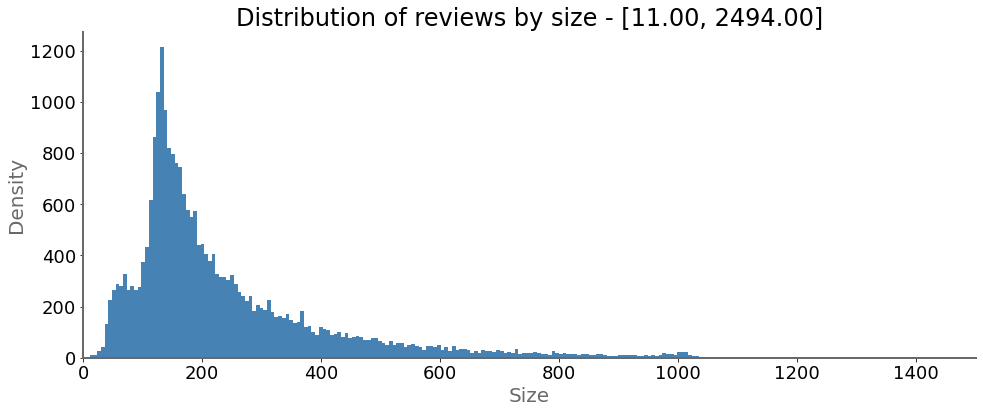

In [6]:
sizes=[len(i) for i in x_train]
plt.figure(figsize=(16,6))
plt.hist(sizes, bins=400)
plt.gca().set(title='Distribution of reviews by size - [{:5.2f}, {:5.2f}]'.format(min(sizes),max(sizes)), 
              xlabel='Size', ylabel='Density', xlim=[0,1500])
pwk.save_fig('01-stats-sizes')
plt.show()

## Step 3 - Preprocess the data (padding)
In order to be processed by an NN, all entries must have the **same length.**  
We chose a review length of **review_len**  
We will therefore complete them with a padding (of \<pad\>\)  

In [7]:
review_len = 256

x_train = keras.preprocessing.sequence.pad_sequences(x_train,
                                                     value   = 0,
                                                     padding = 'post',
                                                     maxlen  = review_len)

x_test  = keras.preprocessing.sequence.pad_sequences(x_test,
                                                     value   = 0 ,
                                                     padding = 'post',
                                                     maxlen  = review_len)

pwk.subtitle('After padding :')
print(x_train[12])
pwk.subtitle('In real words :')
print(dataset2text(x_train[12]))

<br>**After padding :**

[   1   14   22 1367   53  206  159    4  636  898   74   26   11  436
  363  108    7   14  432   14   22    9 1055   34 8599    2    5  381
 3705 4509   14  768   47  839   25  111 1517 2579 1991  438 2663  587
    4  280  725    6   58   11 2714  201    4  206   16  702    5 5176
   19  480 5920  157   13   64  219    4    2   11  107  665 1212   39
    4  206    4   65  410   16  565    5   24   43  343   17 5602    8
  169  101   85  206  108    8 3008   14   25  215  168   18    6 2579
 1991  438    2   11  129 1609   36   26   66  290 3303   46    5  633
  115 4363    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

<br>**In real words :**

<start> this film contains more action before the opening credits than are in entire hollywood films of this sort this film is produced by tsui <unknown> and stars jet li this team has brought you many worthy hong kong cinema productions including the once upon a time in china series the action was fast and furious with amazing wire work i only saw the <unknown> in two shots aside from the action the story itself was strong and not just used as filler to find any other action films to rival this you must look for a hong kong cinema <unknown> in your area they are really worth checking out and usually never disappoint <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pa

**Save dataset and dictionary (For future use but not mandatory)**

In [8]:
# ---- Write dataset in a h5 file, could be usefull
#
output_dir = './data'
pwk.mkdir(output_dir)

with h5py.File(f'{output_dir}/dataset_imdb.h5', 'w') as f:
    f.create_dataset("x_train",    data=x_train)
    f.create_dataset("y_train",    data=y_train)
    f.create_dataset("x_test",     data=x_test)
    f.create_dataset("y_test",     data=y_test)

with open(f'{output_dir}/word_index.json', 'w') as fp:
    json.dump(word_index, fp)

with open(f'{output_dir}/index_word.json', 'w') as fp:
    json.dump(index_word, fp)

print('Saved.')

Saved.


## Step 4 - Build the model
Few remarks :
 - We'll choose a dense vector size for the embedding output with **dense_vector_size**
 - **GlobalAveragePooling1D** do a pooling on the last dimension : (None, lx, ly) -> (None, ly)  
   In other words: we average the set of vectors/words of a sentence
 - L'embedding de Keras fonctionne de manière supervisée. Il s'agit d'une couche de *vocab_size* neurones vers *n_neurons* permettant de maintenir une table de vecteurs (les poids constituent les vecteurs). Cette couche ne calcule pas de sortie a la façon des couches normales, mais renvois la valeur des vecteurs. n mots => n vecteurs (ensuite empilés par le pooling)  
Voir : [Explication plus détaillée (en)](https://stats.stackexchange.com/questions/324992/how-the-embedding-layer-is-trained-in-keras-embedding-layer)  
ainsi que : [Sentiment detection with Keras](https://www.liip.ch/en/blog/sentiment-detection-with-keras-word-embeddings-and-lstm-deep-learning-networks)  

More documentation about this model functions :
 - [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)
 - [GlobalAveragePooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D)

In [9]:
def get_model(dense_vector_size=32):
    
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim    = vocab_size, 
                                     output_dim   = dense_vector_size, 
                                     input_length = review_len))
    model.add(keras.layers.GlobalAveragePooling1D())
    model.add(keras.layers.Dense(dense_vector_size, activation='relu'))
    model.add(keras.layers.Dense(1,                 activation='sigmoid'))

    model.compile(optimizer = 'adam',
                  loss      = 'binary_crossentropy',
                  metrics   = ['accuracy'])
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [10]:
model = get_model(32)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 32)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 321,089
Trainable params: 321,089
Non-trainable params: 0
_________________________________________________________________


### 5.2 - Add callback

In [11]:
os.makedirs('./run/models',   mode=0o750, exist_ok=True)
save_dir = "./run/models/best_model.h5"
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose=0, save_best_only=True)

### 5.1 - Train it

In [12]:
%%time

n_epochs   = 30
batch_size = 512

history = model.fit(x_train,
                    y_train,
                    epochs          = n_epochs,
                    batch_size      = batch_size,
                    validation_data = (x_test, y_test),
                    verbose         = 1,
                    callbacks       = [savemodel_callback])


Epoch 1/30


 1/49 [..............................] - ETA: 1:01 - loss: 0.6933 - accuracy: 0.4902

 6/49 [==>...........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.5039  

12/49 [======>.......................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5110

18/49 [==========>...................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5118

24/49 [=============>................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5110

30/49 [=================>............] - ETA: 0s - loss: 0.6928 - accuracy: 0.5136

36/49 [=====================>........] - ETA: 0s - loss: 0.6926 - accuracy: 0.5205

42/49 [========================>.....] - ETA: 0s - loss: 0.6925 - accuracy: 0.5282

48/49 [============================>.] - ETA: 0s - loss: 0.6922 - accuracy: 0.5358

49/49 [==============================] - 3s 31ms/step - loss: 0.6921 - accuracy: 0.5383 - val_loss: 0.6828 - val_accuracy: 0.6852


Epoch 2/30
 1/49 [..............................] - ETA: 0s - loss: 0.6817 - accuracy: 0.7070

 7/49 [===>..........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.6970

13/49 [======>.......................] - ETA: 0s - loss: 0.6802 - accuracy: 0.6879

19/49 [==========>...................] - ETA: 0s - loss: 0.6791 - accuracy: 0.6897

25/49 [==============>...............] - ETA: 0s - loss: 0.6779 - accuracy: 0.6927

31/49 [=================>............] - ETA: 0s - loss: 0.6766 - accuracy: 0.6953

37/49 [=====================>........] - ETA: 0s - loss: 0.6752 - accuracy: 0.6979

43/49 [=========================>....] - ETA: 0s - loss: 0.6738 - accuracy: 0.7006

49/49 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.7035

49/49 [==============================] - 1s 14ms/step - loss: 0.6719 - accuracy: 0.7040 - val_loss: 0.6262 - val_accuracy: 0.7627


Epoch 3/30
 1/49 [..............................] - ETA: 0s - loss: 0.6266 - accuracy: 0.7480

 7/49 [===>..........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7796

13/49 [======>.......................] - ETA: 0s - loss: 0.6158 - accuracy: 0.7807

19/49 [==========>...................] - ETA: 0s - loss: 0.6128 - accuracy: 0.7821

25/49 [==============>...............] - ETA: 0s - loss: 0.6096 - accuracy: 0.7830

31/49 [=================>............] - ETA: 0s - loss: 0.6064 - accuracy: 0.7841

37/49 [=====================>........] - ETA: 0s - loss: 0.6031 - accuracy: 0.7853

43/49 [=========================>....] - ETA: 0s - loss: 0.5997 - accuracy: 0.7868

49/49 [==============================] - ETA: 0s - loss: 0.5963 - accuracy: 0.7883

49/49 [==============================] - 1s 14ms/step - loss: 0.5958 - accuracy: 0.7886 - val_loss: 0.5218 - val_accuracy: 0.8146


Epoch 4/30
 1/49 [..............................] - ETA: 0s - loss: 0.5124 - accuracy: 0.8223

 7/49 [===>..........................] - ETA: 0s - loss: 0.5033 - accuracy: 0.8356

13/49 [======>.......................] - ETA: 0s - loss: 0.5004 - accuracy: 0.8366

19/49 [==========>...................] - ETA: 0s - loss: 0.4969 - accuracy: 0.8375

25/49 [==============>...............] - ETA: 0s - loss: 0.4934 - accuracy: 0.8381

31/49 [=================>............] - ETA: 0s - loss: 0.4900 - accuracy: 0.8390

37/49 [=====================>........] - ETA: 0s - loss: 0.4867 - accuracy: 0.8399

43/49 [=========================>....] - ETA: 0s - loss: 0.4834 - accuracy: 0.8410

49/49 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.8420

49/49 [==============================] - 1s 14ms/step - loss: 0.4796 - accuracy: 0.8421 - val_loss: 0.4256 - val_accuracy: 0.8419


Epoch 5/30
 1/49 [..............................] - ETA: 0s - loss: 0.4083 - accuracy: 0.8574

 7/49 [===>..........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8659

13/49 [======>.......................] - ETA: 0s - loss: 0.3974 - accuracy: 0.8651

19/49 [==========>...................] - ETA: 0s - loss: 0.3959 - accuracy: 0.8656

25/49 [==============>...............] - ETA: 0s - loss: 0.3938 - accuracy: 0.8664

31/49 [=================>............] - ETA: 0s - loss: 0.3916 - accuracy: 0.8671

37/49 [=====================>........] - ETA: 0s - loss: 0.3892 - accuracy: 0.8679

43/49 [=========================>....] - ETA: 0s - loss: 0.3867 - accuracy: 0.8686

49/49 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8694

49/49 [==============================] - 1s 14ms/step - loss: 0.3841 - accuracy: 0.8695 - val_loss: 0.3668 - val_accuracy: 0.8599


Epoch 6/30
 1/49 [..............................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8770

 7/49 [===>..........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.8882

13/49 [======>.......................] - ETA: 0s - loss: 0.3251 - accuracy: 0.8888

19/49 [==========>...................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8885

25/49 [==============>...............] - ETA: 0s - loss: 0.3232 - accuracy: 0.8880

31/49 [=================>............] - ETA: 0s - loss: 0.3224 - accuracy: 0.8879

37/49 [=====================>........] - ETA: 0s - loss: 0.3212 - accuracy: 0.8880

43/49 [=========================>....] - ETA: 0s - loss: 0.3200 - accuracy: 0.8882

49/49 [==============================] - ETA: 0s - loss: 0.3191 - accuracy: 0.8883

49/49 [==============================] - 1s 14ms/step - loss: 0.3189 - accuracy: 0.8883 - val_loss: 0.3344 - val_accuracy: 0.8675


Epoch 7/30
 1/49 [..............................] - ETA: 0s - loss: 0.2907 - accuracy: 0.9062

 7/49 [===>..........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.9020

13/49 [======>.......................] - ETA: 0s - loss: 0.2836 - accuracy: 0.9005

19/49 [==========>...................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8997

25/49 [==============>...............] - ETA: 0s - loss: 0.2839 - accuracy: 0.8993

31/49 [=================>............] - ETA: 0s - loss: 0.2835 - accuracy: 0.8993

37/49 [=====================>........] - ETA: 0s - loss: 0.2826 - accuracy: 0.8995

43/49 [=========================>....] - ETA: 0s - loss: 0.2817 - accuracy: 0.8997

49/49 [==============================] - ETA: 0s - loss: 0.2809 - accuracy: 0.8999

49/49 [==============================] - 1s 14ms/step - loss: 0.2808 - accuracy: 0.8999 - val_loss: 0.3156 - val_accuracy: 0.8719


Epoch 8/30
 1/49 [..............................] - ETA: 0s - loss: 0.2778 - accuracy: 0.8945

 7/49 [===>..........................] - ETA: 0s - loss: 0.2642 - accuracy: 0.8993

13/49 [======>.......................] - ETA: 0s - loss: 0.2604 - accuracy: 0.9032

19/49 [==========>...................] - ETA: 0s - loss: 0.2581 - accuracy: 0.9053

25/49 [==============>...............] - ETA: 0s - loss: 0.2564 - accuracy: 0.9067

31/49 [=================>............] - ETA: 0s - loss: 0.2555 - accuracy: 0.9074

37/49 [=====================>........] - ETA: 0s - loss: 0.2546 - accuracy: 0.9079

43/49 [=========================>....] - ETA: 0s - loss: 0.2540 - accuracy: 0.9081

49/49 [==============================] - ETA: 0s - loss: 0.2535 - accuracy: 0.9083

49/49 [==============================] - 1s 14ms/step - loss: 0.2534 - accuracy: 0.9083 - val_loss: 0.3022 - val_accuracy: 0.8760


Epoch 9/30
 1/49 [..............................] - ETA: 0s - loss: 0.2660 - accuracy: 0.9004

 7/49 [===>..........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.9114

13/49 [======>.......................] - ETA: 0s - loss: 0.2392 - accuracy: 0.9107

19/49 [==========>...................] - ETA: 0s - loss: 0.2391 - accuracy: 0.9110

25/49 [==============>...............] - ETA: 0s - loss: 0.2381 - accuracy: 0.9118

31/49 [=================>............] - ETA: 0s - loss: 0.2373 - accuracy: 0.9125

37/49 [=====================>........] - ETA: 0s - loss: 0.2365 - accuracy: 0.9130

43/49 [=========================>....] - ETA: 0s - loss: 0.2355 - accuracy: 0.9136

49/49 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9142

49/49 [==============================] - 1s 14ms/step - loss: 0.2345 - accuracy: 0.9142 - val_loss: 0.2940 - val_accuracy: 0.8792


Epoch 10/30
 1/49 [..............................] - ETA: 0s - loss: 0.2016 - accuracy: 0.9434

 7/49 [===>..........................] - ETA: 0s - loss: 0.2095 - accuracy: 0.9305

13/49 [======>.......................] - ETA: 0s - loss: 0.2084 - accuracy: 0.9290

19/49 [==========>...................] - ETA: 0s - loss: 0.2084 - accuracy: 0.9282

25/49 [==============>...............] - ETA: 0s - loss: 0.2089 - accuracy: 0.9275

31/49 [=================>............] - ETA: 0s - loss: 0.2098 - accuracy: 0.9268

37/49 [=====================>........] - ETA: 0s - loss: 0.2105 - accuracy: 0.9262

43/49 [=========================>....] - ETA: 0s - loss: 0.2109 - accuracy: 0.9258

49/49 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.9256

49/49 [==============================] - 1s 14ms/step - loss: 0.2110 - accuracy: 0.9256 - val_loss: 0.2896 - val_accuracy: 0.8812


Epoch 11/30
 1/49 [..............................] - ETA: 0s - loss: 0.2010 - accuracy: 0.9277

 7/49 [===>..........................] - ETA: 0s - loss: 0.2021 - accuracy: 0.9291

13/49 [======>.......................] - ETA: 0s - loss: 0.2014 - accuracy: 0.9292

19/49 [==========>...................] - ETA: 0s - loss: 0.2003 - accuracy: 0.9293

25/49 [==============>...............] - ETA: 0s - loss: 0.1997 - accuracy: 0.9291

31/49 [=================>............] - ETA: 0s - loss: 0.1996 - accuracy: 0.9291

37/49 [=====================>........] - ETA: 0s - loss: 0.1995 - accuracy: 0.9293

43/49 [=========================>....] - ETA: 0s - loss: 0.1992 - accuracy: 0.9294

49/49 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9295

49/49 [==============================] - 1s 14ms/step - loss: 0.1989 - accuracy: 0.9295 - val_loss: 0.2869 - val_accuracy: 0.8822


Epoch 12/30
 1/49 [..............................] - ETA: 0s - loss: 0.1672 - accuracy: 0.9492

 7/49 [===>..........................] - ETA: 0s - loss: 0.1748 - accuracy: 0.9410

13/49 [======>.......................] - ETA: 0s - loss: 0.1775 - accuracy: 0.9392

19/49 [==========>...................] - ETA: 0s - loss: 0.1779 - accuracy: 0.9389

25/49 [==============>...............] - ETA: 0s - loss: 0.1779 - accuracy: 0.9390

31/49 [=================>............] - ETA: 0s - loss: 0.1785 - accuracy: 0.9387

37/49 [=====================>........] - ETA: 0s - loss: 0.1791 - accuracy: 0.9384

43/49 [=========================>....] - ETA: 0s - loss: 0.1796 - accuracy: 0.9382

49/49 [==============================] - ETA: 0s - loss: 0.1800 - accuracy: 0.9379

49/49 [==============================] - 1s 14ms/step - loss: 0.1801 - accuracy: 0.9379 - val_loss: 0.2868 - val_accuracy: 0.8837


Epoch 13/30
 1/49 [..............................] - ETA: 0s - loss: 0.1818 - accuracy: 0.9316

 7/49 [===>..........................] - ETA: 0s - loss: 0.1774 - accuracy: 0.9359

13/49 [======>.......................] - ETA: 0s - loss: 0.1785 - accuracy: 0.9369

19/49 [==========>...................] - ETA: 0s - loss: 0.1795 - accuracy: 0.9369

25/49 [==============>...............] - ETA: 0s - loss: 0.1794 - accuracy: 0.9368

31/49 [=================>............] - ETA: 0s - loss: 0.1789 - accuracy: 0.9371

37/49 [=====================>........] - ETA: 0s - loss: 0.1780 - accuracy: 0.9376

43/49 [=========================>....] - ETA: 0s - loss: 0.1773 - accuracy: 0.9380

49/49 [==============================] - ETA: 0s - loss: 0.1768 - accuracy: 0.9383

49/49 [==============================] - 1s 14ms/step - loss: 0.1767 - accuracy: 0.9383 - val_loss: 0.2902 - val_accuracy: 0.8819


Epoch 14/30
 1/49 [..............................] - ETA: 0s - loss: 0.1752 - accuracy: 0.9375

 7/49 [===>..........................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9430

13/49 [======>.......................] - ETA: 0s - loss: 0.1669 - accuracy: 0.9424

19/49 [==========>...................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9430

25/49 [==============>...............] - ETA: 0s - loss: 0.1656 - accuracy: 0.9433

31/49 [=================>............] - ETA: 0s - loss: 0.1653 - accuracy: 0.9435

37/49 [=====================>........] - ETA: 0s - loss: 0.1652 - accuracy: 0.9434

43/49 [=========================>....] - ETA: 0s - loss: 0.1651 - accuracy: 0.9434

49/49 [==============================] - ETA: 0s - loss: 0.1649 - accuracy: 0.9435

49/49 [==============================] - 1s 14ms/step - loss: 0.1648 - accuracy: 0.9435 - val_loss: 0.2910 - val_accuracy: 0.8811


Epoch 15/30
 1/49 [..............................] - ETA: 0s - loss: 0.1498 - accuracy: 0.9512

 7/49 [===>..........................] - ETA: 0s - loss: 0.1524 - accuracy: 0.9517

13/49 [======>.......................] - ETA: 0s - loss: 0.1535 - accuracy: 0.9512

19/49 [==========>...................] - ETA: 0s - loss: 0.1542 - accuracy: 0.9502

25/49 [==============>...............] - ETA: 0s - loss: 0.1540 - accuracy: 0.9499

31/49 [=================>............] - ETA: 0s - loss: 0.1541 - accuracy: 0.9494

37/49 [=====================>........] - ETA: 0s - loss: 0.1540 - accuracy: 0.9491

43/49 [=========================>....] - ETA: 0s - loss: 0.1540 - accuracy: 0.9489

49/49 [==============================] - ETA: 0s - loss: 0.1540 - accuracy: 0.9488

49/49 [==============================] - 1s 14ms/step - loss: 0.1540 - accuracy: 0.9487 - val_loss: 0.2943 - val_accuracy: 0.8825


Epoch 16/30
 1/49 [..............................] - ETA: 0s - loss: 0.1562 - accuracy: 0.9473

 7/49 [===>..........................] - ETA: 0s - loss: 0.1416 - accuracy: 0.9533

13/49 [======>.......................] - ETA: 0s - loss: 0.1410 - accuracy: 0.9542

19/49 [==========>...................] - ETA: 0s - loss: 0.1404 - accuracy: 0.9546

25/49 [==============>...............] - ETA: 0s - loss: 0.1403 - accuracy: 0.9547

31/49 [=================>............] - ETA: 0s - loss: 0.1403 - accuracy: 0.9547

37/49 [=====================>........] - ETA: 0s - loss: 0.1409 - accuracy: 0.9544

43/49 [=========================>....] - ETA: 0s - loss: 0.1414 - accuracy: 0.9541

49/49 [==============================] - ETA: 0s - loss: 0.1419 - accuracy: 0.9539

49/49 [==============================] - 1s 14ms/step - loss: 0.1419 - accuracy: 0.9539 - val_loss: 0.2984 - val_accuracy: 0.8818


Epoch 17/30
 1/49 [..............................] - ETA: 0s - loss: 0.1232 - accuracy: 0.9648

 7/49 [===>..........................] - ETA: 0s - loss: 0.1462 - accuracy: 0.9531

13/49 [======>.......................] - ETA: 0s - loss: 0.1447 - accuracy: 0.9542

19/49 [==========>...................] - ETA: 0s - loss: 0.1429 - accuracy: 0.9546

25/49 [==============>...............] - ETA: 0s - loss: 0.1419 - accuracy: 0.9548

31/49 [=================>............] - ETA: 0s - loss: 0.1410 - accuracy: 0.9549

37/49 [=====================>........] - ETA: 0s - loss: 0.1404 - accuracy: 0.9550

43/49 [=========================>....] - ETA: 0s - loss: 0.1400 - accuracy: 0.9550

49/49 [==============================] - ETA: 0s - loss: 0.1398 - accuracy: 0.9550

49/49 [==============================] - 1s 14ms/step - loss: 0.1397 - accuracy: 0.9550 - val_loss: 0.3030 - val_accuracy: 0.8810


Epoch 18/30
 1/49 [..............................] - ETA: 0s - loss: 0.1318 - accuracy: 0.9512

 7/49 [===>..........................] - ETA: 0s - loss: 0.1291 - accuracy: 0.9554

13/49 [======>.......................] - ETA: 0s - loss: 0.1294 - accuracy: 0.9561

19/49 [==========>...................] - ETA: 0s - loss: 0.1296 - accuracy: 0.9562

25/49 [==============>...............] - ETA: 0s - loss: 0.1296 - accuracy: 0.9564

31/49 [=================>............] - ETA: 0s - loss: 0.1297 - accuracy: 0.9566

37/49 [=====================>........] - ETA: 0s - loss: 0.1299 - accuracy: 0.9566

43/49 [=========================>....] - ETA: 0s - loss: 0.1302 - accuracy: 0.9566

49/49 [==============================] - ETA: 0s - loss: 0.1304 - accuracy: 0.9566

49/49 [==============================] - 1s 14ms/step - loss: 0.1304 - accuracy: 0.9566 - val_loss: 0.3097 - val_accuracy: 0.8803


Epoch 19/30
 1/49 [..............................] - ETA: 0s - loss: 0.1278 - accuracy: 0.9590

 7/49 [===>..........................] - ETA: 0s - loss: 0.1235 - accuracy: 0.9626

13/49 [======>.......................] - ETA: 0s - loss: 0.1237 - accuracy: 0.9621

19/49 [==========>...................] - ETA: 0s - loss: 0.1234 - accuracy: 0.9621

25/49 [==============>...............] - ETA: 0s - loss: 0.1230 - accuracy: 0.9620

31/49 [=================>............] - ETA: 0s - loss: 0.1229 - accuracy: 0.9618

37/49 [=====================>........] - ETA: 0s - loss: 0.1228 - accuracy: 0.9617

43/49 [=========================>....] - ETA: 0s - loss: 0.1229 - accuracy: 0.9616

49/49 [==============================] - ETA: 0s - loss: 0.1231 - accuracy: 0.9615

49/49 [==============================] - 1s 14ms/step - loss: 0.1231 - accuracy: 0.9614 - val_loss: 0.3163 - val_accuracy: 0.8770


Epoch 20/30
 1/49 [..............................] - ETA: 0s - loss: 0.1168 - accuracy: 0.9609

 7/49 [===>..........................] - ETA: 0s - loss: 0.1226 - accuracy: 0.9589

13/49 [======>.......................] - ETA: 0s - loss: 0.1207 - accuracy: 0.9604

19/49 [==========>...................] - ETA: 0s - loss: 0.1197 - accuracy: 0.9610

25/49 [==============>...............] - ETA: 0s - loss: 0.1193 - accuracy: 0.9615

31/49 [=================>............] - ETA: 0s - loss: 0.1190 - accuracy: 0.9620

37/49 [=====================>........] - ETA: 0s - loss: 0.1187 - accuracy: 0.9622

43/49 [=========================>....] - ETA: 0s - loss: 0.1186 - accuracy: 0.9623

49/49 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9624

49/49 [==============================] - 1s 14ms/step - loss: 0.1184 - accuracy: 0.9624 - val_loss: 0.3243 - val_accuracy: 0.8764


Epoch 21/30
 1/49 [..............................] - ETA: 0s - loss: 0.1182 - accuracy: 0.9629

 7/49 [===>..........................] - ETA: 0s - loss: 0.1224 - accuracy: 0.9622

13/49 [======>.......................] - ETA: 0s - loss: 0.1180 - accuracy: 0.9645

19/49 [==========>...................] - ETA: 0s - loss: 0.1155 - accuracy: 0.9657

25/49 [==============>...............] - ETA: 0s - loss: 0.1145 - accuracy: 0.9659

31/49 [=================>............] - ETA: 0s - loss: 0.1141 - accuracy: 0.9659

37/49 [=====================>........] - ETA: 0s - loss: 0.1137 - accuracy: 0.9659

43/49 [=========================>....] - ETA: 0s - loss: 0.1136 - accuracy: 0.9658

49/49 [==============================] - ETA: 0s - loss: 0.1136 - accuracy: 0.9656

49/49 [==============================] - 1s 14ms/step - loss: 0.1136 - accuracy: 0.9656 - val_loss: 0.3320 - val_accuracy: 0.8748


Epoch 22/30
 1/49 [..............................] - ETA: 0s - loss: 0.1286 - accuracy: 0.9707

 7/49 [===>..........................] - ETA: 0s - loss: 0.1189 - accuracy: 0.9675

13/49 [======>.......................] - ETA: 0s - loss: 0.1150 - accuracy: 0.9674

19/49 [==========>...................] - ETA: 0s - loss: 0.1130 - accuracy: 0.9674

25/49 [==============>...............] - ETA: 0s - loss: 0.1120 - accuracy: 0.9672

31/49 [=================>............] - ETA: 0s - loss: 0.1113 - accuracy: 0.9670

37/49 [=====================>........] - ETA: 0s - loss: 0.1105 - accuracy: 0.9670

43/49 [=========================>....] - ETA: 0s - loss: 0.1099 - accuracy: 0.9670

49/49 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9669

49/49 [==============================] - 1s 14ms/step - loss: 0.1096 - accuracy: 0.9669 - val_loss: 0.3408 - val_accuracy: 0.8736


Epoch 23/30
 1/49 [..............................] - ETA: 0s - loss: 0.1202 - accuracy: 0.9629

 7/49 [===>..........................] - ETA: 0s - loss: 0.1116 - accuracy: 0.9665

13/49 [======>.......................] - ETA: 0s - loss: 0.1090 - accuracy: 0.9676

19/49 [==========>...................] - ETA: 0s - loss: 0.1067 - accuracy: 0.9684

25/49 [==============>...............] - ETA: 0s - loss: 0.1054 - accuracy: 0.9688

31/49 [=================>............] - ETA: 0s - loss: 0.1046 - accuracy: 0.9691

37/49 [=====================>........] - ETA: 0s - loss: 0.1044 - accuracy: 0.9693

43/49 [=========================>....] - ETA: 0s - loss: 0.1042 - accuracy: 0.9695

49/49 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9695

49/49 [==============================] - 1s 14ms/step - loss: 0.1039 - accuracy: 0.9695 - val_loss: 0.3508 - val_accuracy: 0.8709


Epoch 24/30
 1/49 [..............................] - ETA: 0s - loss: 0.1081 - accuracy: 0.9668

 7/49 [===>..........................] - ETA: 0s - loss: 0.0966 - accuracy: 0.9727

13/49 [======>.......................] - ETA: 0s - loss: 0.0956 - accuracy: 0.9734

19/49 [==========>...................] - ETA: 0s - loss: 0.0962 - accuracy: 0.9734

25/49 [==============>...............] - ETA: 0s - loss: 0.0971 - accuracy: 0.9730

31/49 [=================>............] - ETA: 0s - loss: 0.0971 - accuracy: 0.9729

37/49 [=====================>........] - ETA: 0s - loss: 0.0971 - accuracy: 0.9727

43/49 [=========================>....] - ETA: 0s - loss: 0.0971 - accuracy: 0.9726

49/49 [==============================] - ETA: 0s - loss: 0.0971 - accuracy: 0.9724

49/49 [==============================] - 1s 14ms/step - loss: 0.0971 - accuracy: 0.9724 - val_loss: 0.3573 - val_accuracy: 0.8711


Epoch 25/30
 1/49 [..............................] - ETA: 0s - loss: 0.0826 - accuracy: 0.9785

 7/49 [===>..........................] - ETA: 0s - loss: 0.0859 - accuracy: 0.9772

13/49 [======>.......................] - ETA: 0s - loss: 0.0878 - accuracy: 0.9770

19/49 [==========>...................] - ETA: 0s - loss: 0.0879 - accuracy: 0.9770

25/49 [==============>...............] - ETA: 0s - loss: 0.0882 - accuracy: 0.9769

31/49 [=================>............] - ETA: 0s - loss: 0.0885 - accuracy: 0.9767

37/49 [=====================>........] - ETA: 0s - loss: 0.0890 - accuracy: 0.9764

43/49 [=========================>....] - ETA: 0s - loss: 0.0893 - accuracy: 0.9760

49/49 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9757

49/49 [==============================] - 1s 14ms/step - loss: 0.0897 - accuracy: 0.9756 - val_loss: 0.3677 - val_accuracy: 0.8694


Epoch 26/30
 1/49 [..............................] - ETA: 0s - loss: 0.0855 - accuracy: 0.9805

 7/49 [===>..........................] - ETA: 0s - loss: 0.0863 - accuracy: 0.9780

13/49 [======>.......................] - ETA: 0s - loss: 0.0847 - accuracy: 0.9783

19/49 [==========>...................] - ETA: 0s - loss: 0.0842 - accuracy: 0.9779

25/49 [==============>...............] - ETA: 0s - loss: 0.0843 - accuracy: 0.9774

31/49 [=================>............] - ETA: 0s - loss: 0.0846 - accuracy: 0.9771

37/49 [=====================>........] - ETA: 0s - loss: 0.0848 - accuracy: 0.9769

43/49 [=========================>....] - ETA: 0s - loss: 0.0851 - accuracy: 0.9766

49/49 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 0.9764

49/49 [==============================] - 1s 14ms/step - loss: 0.0855 - accuracy: 0.9764 - val_loss: 0.3756 - val_accuracy: 0.8700


Epoch 27/30
 1/49 [..............................] - ETA: 0s - loss: 0.0905 - accuracy: 0.9707

 7/49 [===>..........................] - ETA: 0s - loss: 0.0879 - accuracy: 0.9758

13/49 [======>.......................] - ETA: 0s - loss: 0.0852 - accuracy: 0.9770

19/49 [==========>...................] - ETA: 0s - loss: 0.0841 - accuracy: 0.9773

25/49 [==============>...............] - ETA: 0s - loss: 0.0834 - accuracy: 0.9775

31/49 [=================>............] - ETA: 0s - loss: 0.0831 - accuracy: 0.9775

37/49 [=====================>........] - ETA: 0s - loss: 0.0831 - accuracy: 0.9774

43/49 [=========================>....] - ETA: 0s - loss: 0.0831 - accuracy: 0.9773

49/49 [==============================] - ETA: 0s - loss: 0.0832 - accuracy: 0.9772

49/49 [==============================] - 1s 14ms/step - loss: 0.0832 - accuracy: 0.9772 - val_loss: 0.3855 - val_accuracy: 0.8676


Epoch 28/30
 1/49 [..............................] - ETA: 0s - loss: 0.0732 - accuracy: 0.9805

 7/49 [===>..........................] - ETA: 0s - loss: 0.0696 - accuracy: 0.9825

13/49 [======>.......................] - ETA: 0s - loss: 0.0694 - accuracy: 0.9831

19/49 [==========>...................] - ETA: 0s - loss: 0.0702 - accuracy: 0.9829

25/49 [==============>...............] - ETA: 0s - loss: 0.0713 - accuracy: 0.9825

31/49 [=================>............] - ETA: 0s - loss: 0.0724 - accuracy: 0.9821

37/49 [=====================>........] - ETA: 0s - loss: 0.0733 - accuracy: 0.9817

43/49 [=========================>....] - ETA: 0s - loss: 0.0739 - accuracy: 0.9813

49/49 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9809

49/49 [==============================] - 1s 14ms/step - loss: 0.0748 - accuracy: 0.9809 - val_loss: 0.4046 - val_accuracy: 0.8639


Epoch 29/30
 1/49 [..............................] - ETA: 0s - loss: 0.0646 - accuracy: 0.9785

 7/49 [===>..........................] - ETA: 0s - loss: 0.0766 - accuracy: 0.9779

13/49 [======>.......................] - ETA: 0s - loss: 0.0804 - accuracy: 0.9764

19/49 [==========>...................] - ETA: 0s - loss: 0.0803 - accuracy: 0.9764

25/49 [==============>...............] - ETA: 0s - loss: 0.0797 - accuracy: 0.9767

31/49 [=================>............] - ETA: 0s - loss: 0.0794 - accuracy: 0.9770

37/49 [=====================>........] - ETA: 0s - loss: 0.0791 - accuracy: 0.9772

43/49 [=========================>....] - ETA: 0s - loss: 0.0790 - accuracy: 0.9774

49/49 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 0.9775

49/49 [==============================] - 1s 14ms/step - loss: 0.0788 - accuracy: 0.9776 - val_loss: 0.4090 - val_accuracy: 0.8645


Epoch 30/30
 1/49 [..............................] - ETA: 0s - loss: 0.0839 - accuracy: 0.9746

 7/49 [===>..........................] - ETA: 0s - loss: 0.0760 - accuracy: 0.9802

13/49 [======>.......................] - ETA: 0s - loss: 0.0758 - accuracy: 0.9805

19/49 [==========>...................] - ETA: 0s - loss: 0.0749 - accuracy: 0.9811

25/49 [==============>...............] - ETA: 0s - loss: 0.0745 - accuracy: 0.9813

31/49 [=================>............] - ETA: 0s - loss: 0.0742 - accuracy: 0.9813

37/49 [=====================>........] - ETA: 0s - loss: 0.0740 - accuracy: 0.9813

43/49 [=========================>....] - ETA: 0s - loss: 0.0739 - accuracy: 0.9812

49/49 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9812

49/49 [==============================] - 1s 14ms/step - loss: 0.0737 - accuracy: 0.9812 - val_loss: 0.4224 - val_accuracy: 0.8634


CPU times: user 41.1 s, sys: 3.59 s, total: 44.7 s
Wall time: 24.1 s


## Step 6 - Evaluate
### 6.1 - Training history

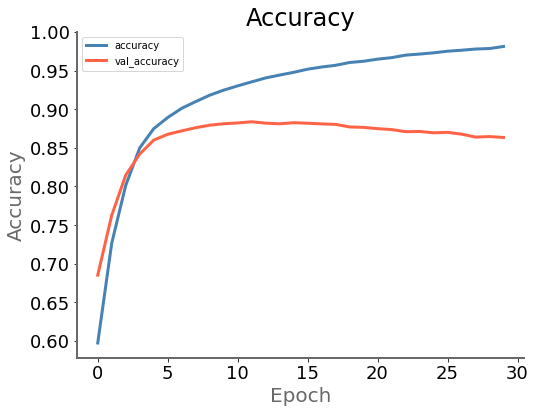

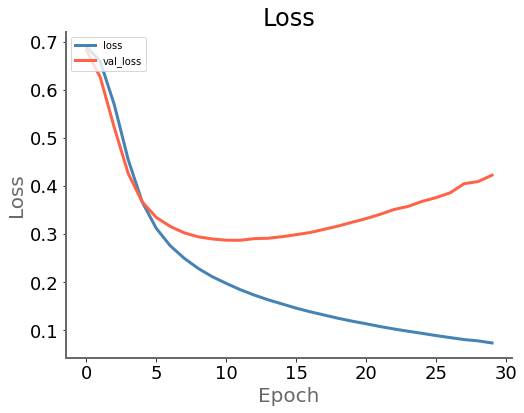

In [13]:
pwk.plot_history(history, save_as='02-history')

### 6.2 - Reload and evaluate best model

x_test / loss      : 0.2868
x_test / accuracy  : 0.8837


#### Accuracy donut is :

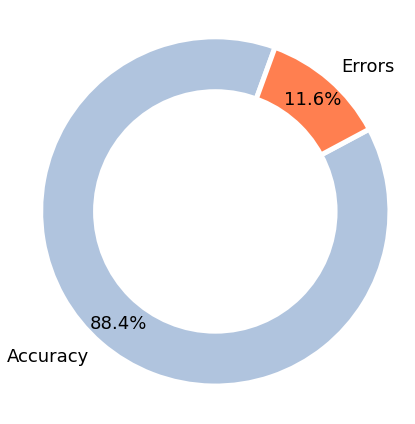

#### Confusion matrix is :

,0,1
0,0.88,0.12
1,0.11,0.89


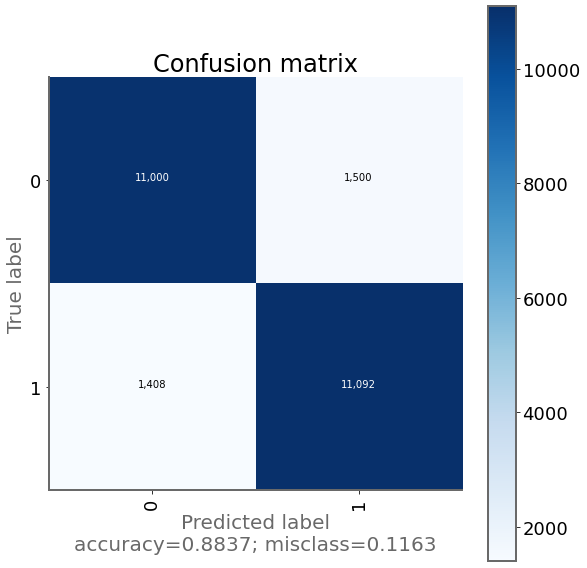

In [14]:
model = keras.models.load_model('./run/models/best_model.h5')

# ---- Evaluate
score  = model.evaluate(x_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / accuracy  : {:5.4f}'.format(score[1]))

values=[score[1], 1-score[1]]
pwk.plot_donut(values,["Accuracy","Errors"], title="#### Accuracy donut is :", save_as='03-donut')

# ---- Confusion matrix

y_sigmoid = model.predict(x_test)

y_pred = y_sigmoid.copy()
y_pred[ y_sigmoid< 0.5 ] = 0
y_pred[ y_sigmoid>=0.5 ] = 1    

pwk.display_confusion_matrix(y_test,y_pred,labels=range(2))
pwk.plot_confusion_matrix(y_test,y_pred,range(2), figsize=(8, 8),normalize=False, save_as='04-confusion-matrix')

In [15]:
pwk.end()

End time is : Wednesday 10 February 2021, 10:47:32
Duration is : 00:00:45 946ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>